In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as numpy
import os

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Define paths
project_dir = '/content/drive/My Drive/Elect_Project/electricity-weather'
notebook_name = 'London_Smart_meter.ipynb'
notebook_path = os.path.join(project_dir, notebook_name)


In [ ]:

folder_path = '/content/drive/My Drive/Small LCL Data'
files = os.listdir(folder_path)
csv_files = [f for f in files if f.endswith('.csv')]
print(len(csv_files))


168


In [ ]:
dfs = []
for files in csv_files:
    full_path = os.path.join(folder_path, files)
    df = pd.read_csv(full_path)
    dfs.append(df)

In [ ]:
combined_data = pd.concat(dfs, ignore_index=True)
combined_data.head()
combined_data.head()


LCLid stdorToU                     DateTime KWH/hh (per half hour) 
0  MAC000036      Std  2012-11-08 10:30:00.0000000                  0.003 
1  MAC000036      Std  2012-11-08 11:00:00.0000000                  0.032 
2  MAC000036      Std  2012-11-08 11:30:00.0000000                  0.035 
3  MAC000036      Std  2012-11-08 12:00:00.0000000                      0 
4  MAC000036      Std  2012-11-08 12:30:00.0000000                      0

In [ ]:
combined_data

LCLid stdorToU                     DateTime  \
0          MAC000036      Std  2012-11-08 10:30:00.0000000   
1          MAC000036      Std  2012-11-08 11:00:00.0000000   
2          MAC000036      Std  2012-11-08 11:30:00.0000000   
3          MAC000036      Std  2012-11-08 12:00:00.0000000   
4          MAC000036      Std  2012-11-08 12:30:00.0000000   
...              ...      ...                          ...   
167932469  MAC004268      Std  2013-06-29 07:00:00.0000000   
167932470  MAC004268      Std  2013-06-29 07:30:00.0000000   
167932471  MAC004268      Std  2013-06-29 08:00:00.0000000   
167932472  MAC004268      Std  2013-06-29 08:30:00.0000000   
167932473  MAC004268      Std  2013-06-29 09:00:00.0000000   

          KWH/hh (per half hour)   
0                          0.003   
1                          0.032   
2                          0.035   
3                              0   
4                              0   
...                           ...  
167932469                  0.151   
167932470                  0.278   
167932471                  0.128   
167932472                  0.049   
167932473                  0.129   

[167932474 rows x 4 columns]

In [ ]:
combined_data.describe()

LCLid  stdorToU                     DateTime  \
count    84000000  84000000                     84000000   
unique       2920         1                        40175   
top     MAC000145       Std  2012-11-20 00:00:00.0000000   
freq        39752  84000000                         5798   

       KWH/hh (per half hour)   
count                 84000000  
unique                    7340  
top                         0   
freq                    973675

In [ ]:
# Check for missing values in the entire DataFrame
missing_values = combined_data.isnull().sum()

# Display missing values for each column
print(missing_values)



LCLid                      0
stdorToU                   0
DateTime                   0
KWH/hh (per half hour)     0
dtype: int64


In [ ]:

# Convert DateTime column to datetime format
combined_data['DateTime'] = pd.to_datetime(combined_data['DateTime'])

In [ ]:

# Split 'DateTime' into 'Date' and 'Time' columns
combined_data['Date'] = combined_data['DateTime'].dt.date
combined_data['Time'] = combined_data['DateTime'].dt.time

In [ ]:
#rearranging columns
columns = ['LCLid', 'stdorToU', 'DateTime', 'Date', 'Time', 'KWH/hh (per half hour) ']
combined_data = combined_data[columns]
combined_data = combined_data.drop(columns=['DateTime'])
combined_data

LCLid stdorToU        Date      Time KWH/hh (per half hour) 
0          MAC000036      Std  2012-11-08  10:30:00                  0.003 
1          MAC000036      Std  2012-11-08  11:00:00                  0.032 
2          MAC000036      Std  2012-11-08  11:30:00                  0.035 
3          MAC000036      Std  2012-11-08  12:00:00                      0 
4          MAC000036      Std  2012-11-08  12:30:00                      0 
...              ...      ...         ...       ...                     ...
167932469  MAC004268      Std  2013-06-29  07:00:00                  0.151 
167932470  MAC004268      Std  2013-06-29  07:30:00                  0.278 
167932471  MAC004268      Std  2013-06-29  08:00:00                  0.128 
167932472  MAC004268      Std  2013-06-29  08:30:00                  0.049 
167932473  MAC004268      Std  2013-06-29  09:00:00                  0.129 

[167932474 rows x 5 columns]

In [ ]:
#save the combined data frame
combined_data.to_csv('/content/drive/My Drive/meter_data.csv', index=False)

In [ ]:
print(combined_data.columns)

Index(['LCLid', 'stdorToU', 'Date', 'Time', 'KWH/hh (per half hour) '], dtype='object')


In [ ]:
# Convert 'KWH/hh (per half hour)' to numeric
combined_data['KWH/hh (per half hour) '] = pd.to_numeric(combined_data['KWH/hh (per half hour) '], errors='coerce')


# Group by 'LCLid', 'stdorToU', and 'Date' columns and sum the 'KWH/hh (per half hour)' column to get daily consumption
daily_consumption = combined_data.groupby(['LCLid', 'stdorToU', 'Date'], as_index=False)['KWH/hh (per half hour) '].sum()

# Rename the columns for clarity
daily_consumption.columns = ['LCLid', 'stdorToU', 'Date', 'Daily_Consumption_KWH']

# Display the first few rows of the daily consumption data
print(daily_consumption.head())


       LCLid stdorToU        Date  Daily_Consumption_KWH
0  MAC000002      Std  2012-10-12                  7.098
1  MAC000002      Std  2012-10-13                 11.087
2  MAC000002      Std  2012-10-14                 13.223
3  MAC000002      Std  2012-10-15                 10.257
4  MAC000002      Std  2012-10-16                  9.769


In [ ]:
daily_consumption.to_csv('/content/drive/My Drive/daily_elect_data.csv', index=False)

In [ ]:
daily_consumption

LCLid stdorToU        Date  Daily_Consumption_KWH
0        MAC000002      Std  2012-10-12                  7.098
1        MAC000002      Std  2012-10-13                 11.087
2        MAC000002      Std  2012-10-14                 13.223
3        MAC000002      Std  2012-10-15                 10.257
4        MAC000002      Std  2012-10-16                  9.769
...            ...      ...         ...                    ...
3510428  MAC005567      Std  2014-02-24                  4.107
3510429  MAC005567      Std  2014-02-25                  5.762
3510430  MAC005567      Std  2014-02-26                  5.066
3510431  MAC005567      Std  2014-02-27                  3.217
3510432  MAC005567      Std  2014-02-28                  0.366

[3510433 rows x 4 columns]

In [ ]:
household_counts_sorted = daily_consumption['LCLid'].value_counts().sort_values(ascending=False)
print(household_counts_sorted)


LCLid
MAC000148    829
MAC000155    829
MAC000149    829
MAC000145    829
MAC000156    829
            ... 
MAC005559      1
MAC001150      1
MAC005560      1
MAC005563      1
MAC005556      1
Name: count, Length: 5566, dtype: int64


In [ ]:
# Group by LCLid and sum daily consumption
household_consumption = daily_consumption.groupby('LCLid')['Daily_Consumption_KWH'].sum().reset_index()
print(household_consumption)

          LCLid  Daily_Consumption_KWH
0     MAC000002            6101.138001
1     MAC000003           14104.433003
2     MAC000004            1120.788000
3     MAC000005            2911.808000
4     MAC000006            2168.325000
...         ...                    ...
5561  MAC005563               0.000000
5562  MAC005564            2314.987999
5563  MAC005565               5.790000
5564  MAC005566            8946.788999
5565  MAC005567            2268.484999

[5566 rows x 2 columns]


In [ ]:
# Group by tariff type
tariff = daily_consumption.groupby('stdorToU')['Daily_Consumption_KWH']

# Calculate mean daily consumption for each tariff type
mean_consumption = tariff.mean()

# Calculate median daily consumption for each tariff type
median_consumption = tariff.median()

# Calculate total consumption for each tariff type
total_consumption = tariff.sum()


<ipython-input-73-a7ac844d26cb>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=total_consumption.index, y=total_consumption.values, palette='viridis')


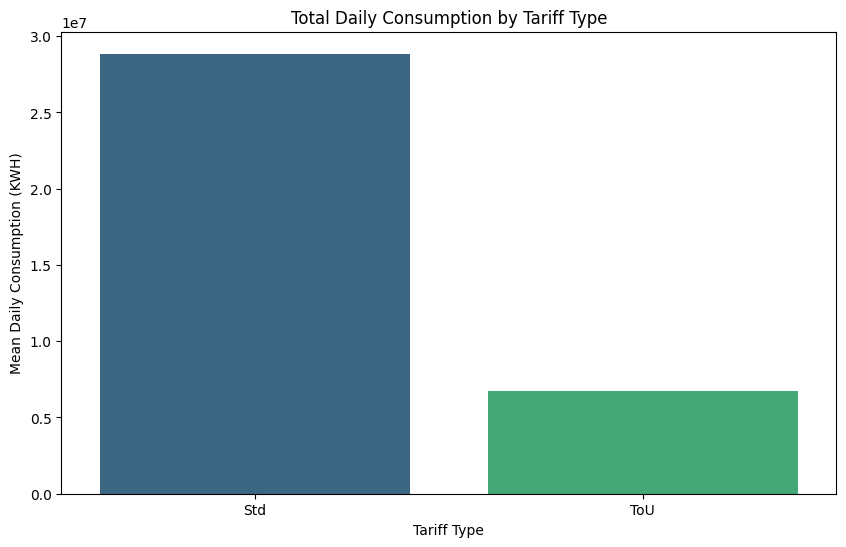

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.barplot(x=total_consumption.index, y=total_consumption.values, palette='viridis')
plt.title('Total Daily Consumption by Tariff Type')
plt.xlabel('Tariff Type')
plt.ylabel('Mean Daily Consumption (KWH)')
plt.show()


In [ ]:
from scipy import stats

# Perform t-test for mean daily consumption between Std and ToU tariffs
t_stat, p_value = stats.ttest_ind(tariff.get_group('Std'), tariff.get_group('ToU'), equal_var=False)
print(f"T-test results: t-statistic = {t_stat}, p-value = {p_value}")


T-test results: t-statistic = 70.43944521798683, p-value = 0.0


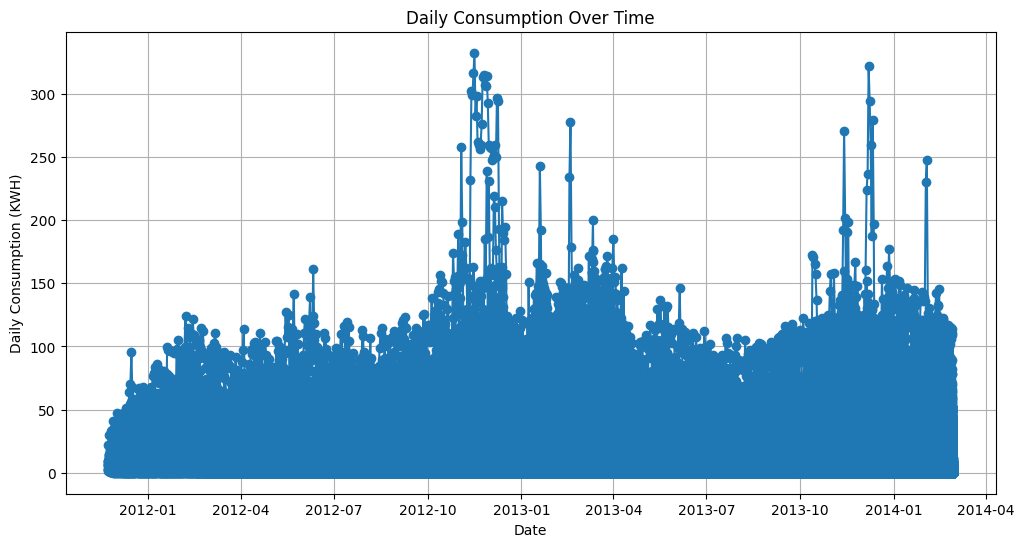

In [ ]:
import matplotlib.pyplot as plt

# Convert 'Date' to datetime format if it's not already
daily_consumption['Date'] = pd.to_datetime(daily_consumption['Date'])

# Time series plot
plt.figure(figsize=(12, 6))
plt.plot(daily_consumption['Date'], daily_consumption['Daily_Consumption_KWH'], marker='o', linestyle='-')
plt.title('Daily Consumption Over Time')
plt.xlabel('Date')
plt.ylabel('Daily Consumption (KWH)')
plt.grid(True)
plt.show()


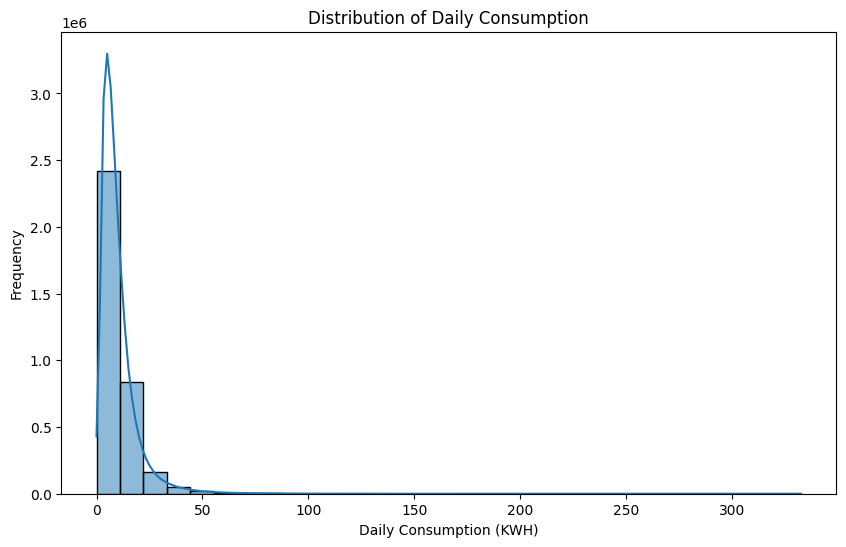

In [ ]:
import seaborn as sns

# Distribution plot
plt.figure(figsize=(10, 6))
sns.histplot(daily_consumption['Daily_Consumption_KWH'], bins=30, kde=True)
plt.title('Distribution of Daily Consumption')
plt.xlabel('Daily Consumption (KWH)')
plt.ylabel('Frequency')
plt.show()


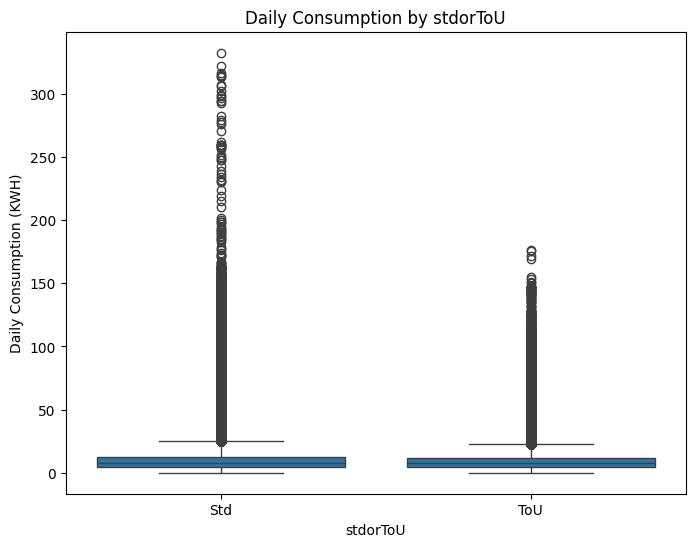

In [ ]:
# Box plot by stdorToU
plt.figure(figsize=(8, 6))
sns.boxplot(x='stdorToU', y='Daily_Consumption_KWH', data=daily_consumption)
plt.title('Daily Consumption by stdorToU')
plt.xlabel('stdorToU')
plt.ylabel('Daily Consumption (KWH)')
plt.show()


<ipython-input-61-d2c6f6b677de>:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='Month', y='Daily_Consumption_KWH', data=daily_consumption, ci=None)


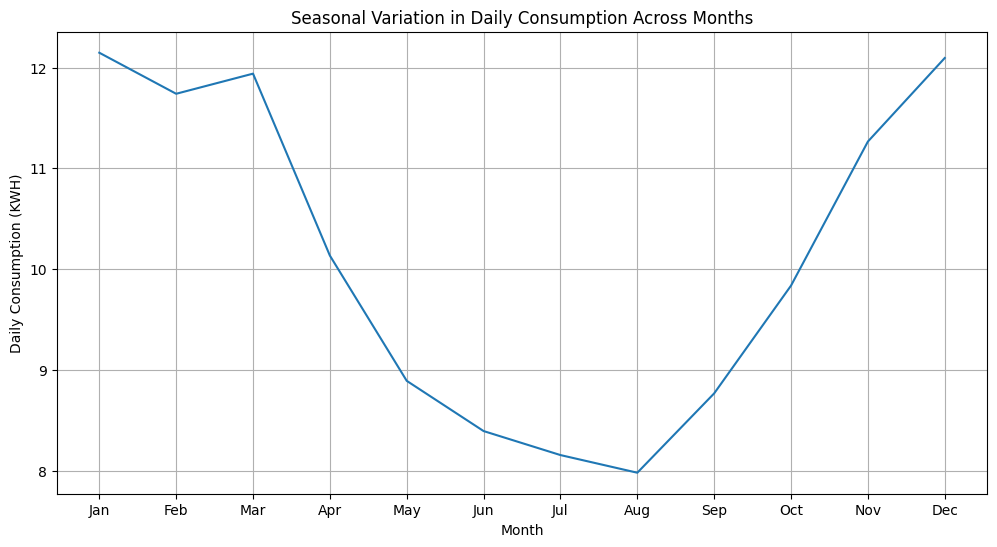

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'Date' is already in datetime format in daily_consumption
daily_consumption['Month'] = daily_consumption['Date'].dt.month

# Seasonal plot across all years
plt.figure(figsize=(12, 6))
sns.lineplot(x='Month', y='Daily_Consumption_KWH', data=daily_consumption, ci=None)
plt.title('Seasonal Variation in Daily Consumption Across Months')
plt.xlabel('Month')
plt.ylabel('Daily Consumption (KWH)')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid(True)
plt.show()


**PREPROCESSING WEATHER DATA**

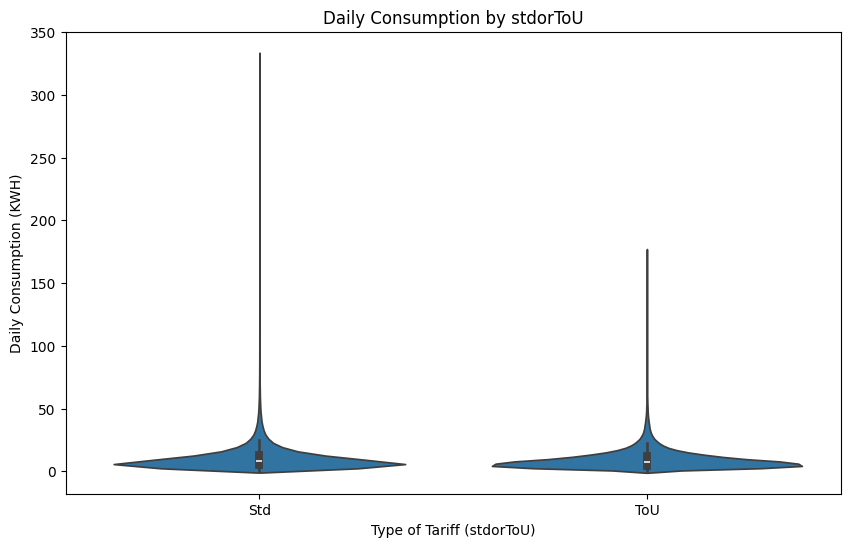

In [ ]:
plt.figure(figsize=(10, 6))
sns.violinplot(x='stdorToU', y='Daily_Consumption_KWH', data=daily_consumption)
plt.title('Daily Consumption by stdorToU')
plt.xlabel('Type of Tariff (stdorToU)')
plt.ylabel('Daily Consumption (KWH)')
plt.show()


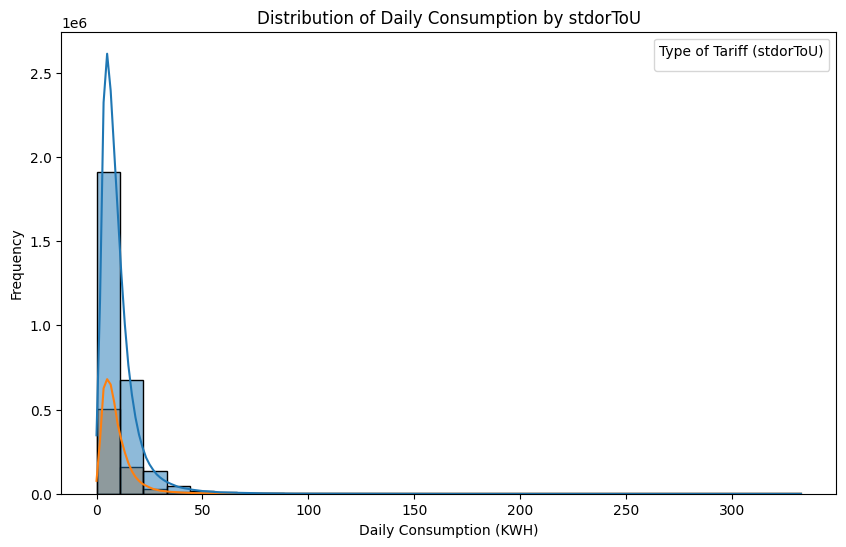

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(data=daily_consumption, x='Daily_Consumption_KWH', hue='stdorToU', kde=True, bins=30)
plt.title('Distribution of Daily Consumption by stdorToU')
plt.xlabel('Daily Consumption (KWH)')
plt.ylabel('Frequency')
plt.legend(title='Type of Tariff (stdorToU)')
plt.show()


In [ ]:


# Navigate into the cloned directory
#cloning github
!git clone https://github.com/greo234/electricity-weather.git

import os
os.chdir('electricity-weather')

# Verify the contents of the directory
!ls


Cloning into 'electricity-weather'...
remote: Enumerating objects: 9, done.
remote: Counting objects: 100% (9/9), done.
remote: Compressing objects: 100% (7/7), done.
remote: Total 9 (delta 1), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (9/9), 434.61 KiB | 1.50 MiB/s, done.
Resolving deltas: 100% (1/1), done.
README.md  weather_data.zip


In [ ]:
# Unzip the weather data folder
import zipfile
with zipfile.ZipFile('weather_data.zip', 'r') as zip_ref:
    zip_ref.extractall('weather_data')

# Verifying the contents
!ls weather_data

cloud_cover.txt  mean_temp.txt	radiation.txt  snow_depth.txt
Humidity.txt	 ppt.txt	sea_level.txt  sunshine.txt


In [ ]:
# Read the first file separately to select specific columns
first_file = "weather_data/cloud_cover.txt"
df_first = pd.read_csv(first_file, skiprows=18, delimiter=',', skipinitialspace=True)

df_first

SOUID      DATE  CC  Q_CC
0      116440  19790101   2     0
1      116440  19790102   6     0
2      116440  19790103   5     0
3      116440  19790104   8     0
4      116440  19790105   6     0
...       ...       ...  ..   ...
16431  116440  20231227   8     0
16432  116440  20231228   7     0
16433  116440  20231229   6     0
16434  116440  20231230   7     0
16435  116440  20231231   7     0

[16436 rows x 4 columns]

In [ ]:

# List all files in the directory except the first file
all_files = [file for file in os.listdir('weather_data') if file.endswith('.txt') and file != 'cloud_cover.txt']


In [ ]:

# Read PP column from each remaining file and store in a list of DataFrames
dfs = []
for file in all_files:
    file_path = os.path.join('weather_data', file)
    df = pd.read_csv(file_path, skiprows=18, usecols=[2], delimiter=',', skipinitialspace=True)
    dfs.append(df)


In [ ]:
# Concatenate all DataFrames along columns (axis=1) to create the final DataFrame
final_df = pd.concat([df_first] + dfs, axis=1)


In [ ]:
columns_to_drop = ['SOUID','Q_CC']
final_df.drop(columns_to_drop, axis=1, inplace=True)
final_df

DATE  CC  RR   TG  HU  SS     PP  SD  QQ
0      19790101   2   4  -41  83  70  10190   9  52
1      19790102   6   0  -26  76  17  10253   8  27
2      19790103   5   0  -28  86   0  10205   4  13
3      19790104   8   0  -26  68   0  10084   2  13
4      19790105   6   0   -8  73  20  10225   1  29
...         ...  ..  ..  ...  ..  ..    ...  ..  ..
16431  20231227   8  46   89  89   0  10067   0  12
16432  20231228   7  48  112  81   2  10051   0  15
16433  20231229   6   0  106  78   7  10071   0  20
16434  20231230   7  56   89  87   0  10046   0  12
16435  20231231   7  16   82  85   5   9891   0  18

[16436 rows x 9 columns]

In [ ]:

# Create DataFrame
weather_df = pd.DataFrame(final_df)

# Convert DATE column to datetime format
weather_df['DATE'] = pd.to_datetime(weather_df['DATE'], format='%Y%m%d')

In [ ]:
# Define the start and end dates for filtering
start_date = '2011-11-23'
end_date = '2014-02-28'

# Filter final_df based on the date range
filt_w = weather_df[(weather_df['DATE'] >= start_date) & (weather_df['DATE'] <= end_date)]
# Resetting the index to start from 0
filt_w.reset_index(drop=True, inplace=True)
filt_w

DATE  CC  RR   TG  HU  SS     PP  SD   QQ
0   2011-11-23   7   2   68  93  20  10272   0   35
1   2011-11-24   3   2   86  88  20  10271   0   35
2   2011-11-25   3   0  110  78  50  10245   0   52
3   2011-11-26   4   0  102  79   7  10258   0   24
4   2011-11-27   3   0  118  69  59  10213   0   55
..         ...  ..  ..  ...  ..  ..    ...  ..  ...
824 2014-02-24   4  32  109  75  44  10050   0   82
825 2014-02-25   5  26   94  78  20  10005   0   60
826 2014-02-26   1  28   74  73  77  10127   0  111
827 2014-02-27   4  48   89  74  49  10070   0   90
828 2014-02-28   7  34   51  85  10   9989   0   50

[829 rows x 9 columns]

In [ ]:
filt_w.to_csv('/content/drive/My Drive/weather_data.csv', index=False)

In [ ]:


# Convert 'Date' column to datetime format in both DataFrames
daily_consumption['Date'] = pd.to_datetime(daily_consumption['Date'])
filt_w['DATE'] = pd.to_datetime(filt_w['DATE'])


# Merge household consumption and weather data on 'Date'
merged_df = pd.merge(daily_consumption, filt_w, left_on='Date', right_on='DATE', how='inner')

# Drop the duplicate 'DATE' column after merging if needed
merged_df.drop(columns=['DATE'], inplace=True)

# Display the merged DataFrame
print(merged_df.head())

<ipython-input-53-dad9c528b038>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filt_w['DATE'] = pd.to_datetime(filt_w['DATE'])


       LCLid stdorToU       Date  Daily_Consumption_KWH  CC  RR   TG  HU  SS  \
0  MAC000002      Std 2012-10-12                  7.098   5   0  123  73  64   
1  MAC000003      Std 2012-10-12                 13.434   5   0  123  73  64   
2  MAC000004      Std 2012-10-12                  1.522   5   0  123  73  64   
3  MAC000005      ToU 2012-10-12                  4.448   5   0  123  73  64   
4  MAC000006      Std 2012-10-12                  4.074   5   0  123  73  64   

      PP  SD   QQ  
0  10058   0  106  
1  10058   0  106  
2  10058   0  106  
3  10058   0  106  
4  10058   0  106  


In [ ]:
merged_df

LCLid stdorToU       Date  Daily_Consumption_KWH  CC  RR   TG  \
0        MAC000002      Std 2012-10-12                  7.098   5   0  123   
1        MAC000003      Std 2012-10-12                 13.434   5   0  123   
2        MAC000004      Std 2012-10-12                  1.522   5   0  123   
3        MAC000005      ToU 2012-10-12                  4.448   5   0  123   
4        MAC000006      Std 2012-10-12                  4.074   5   0  123   
...            ...      ...        ...                    ...  ..  ..  ...   
3510428  MAC000267      Std 2011-12-05                 12.654   1   0   48   
3510429  MAC000268      Std 2011-12-05                  3.099   1   0   48   
3510430  MAC000269      Std 2011-12-05                  1.116   1   0   48   
3510431  MAC000270      Std 2011-12-05                 12.937   1   0   48   
3510432  MAC000271      Std 2011-12-05                  6.863   1   0   48   

         HU  SS     PP  SD   QQ  
0        73  64  10058   0  106  
1        73  64  10058   0  106  
2        73  64  10058   0  106  
3        73  64  10058   0  106  
4        73  64  10058   0  106  
...      ..  ..    ...  ..  ...  
3510428  77  31  10061   0   35  
3510429  77  31  10061   0   35  
3510430  77  31  10061   0   35  
3510431  77  31  10061   0   35  
3510432  77  31  10061   0   35  

[3510433 rows x 12 columns]

In [ ]:
merged_df.to_csv('/content/drive/My Drive/electricity_weather.csv', index=False)

PART 2: Using My Preprocessed Dataset

In [24]:
daily_path = '/content/drive/My Drive/daily_elect_data.csv'
elect_path = '/content/drive/My Drive/meter_data.csv'
weather_path = '/content/drive/My Drive/weather_data.csv'
merged_path = '/content/drive/My Drive/electricity_weather.csv'


In [25]:
merged_data = pd.read_csv(merged_path)
merged_data

LCLid stdorToU        Date  Daily_Consumption_KWH  CC  RR   TG  \
0        MAC000002      Std  2012-10-12                  7.098   5   0  123   
1        MAC000003      Std  2012-10-12                 13.434   5   0  123   
2        MAC000004      Std  2012-10-12                  1.522   5   0  123   
3        MAC000005      ToU  2012-10-12                  4.448   5   0  123   
4        MAC000006      Std  2012-10-12                  4.074   5   0  123   
...            ...      ...         ...                    ...  ..  ..  ...   
3510428  MAC000267      Std  2011-12-05                 12.654   1   0   48   
3510429  MAC000268      Std  2011-12-05                  3.099   1   0   48   
3510430  MAC000269      Std  2011-12-05                  1.116   1   0   48   
3510431  MAC000270      Std  2011-12-05                 12.937   1   0   48   
3510432  MAC000271      Std  2011-12-05                  6.863   1   0   48   

         HU  SS     PP  SD   QQ  
0        73  64  10058   0  106  
1        73  64  10058   0  106  
2        73  64  10058   0  106  
3        73  64  10058   0  106  
4        73  64  10058   0  106  
...      ..  ..    ...  ..  ...  
3510428  77  31  10061   0   35  
3510429  77  31  10061   0   35  
3510430  77  31  10061   0   35  
3510431  77  31  10061   0   35  
3510432  77  31  10061   0   35  

[3510433 rows x 12 columns]

In [7]:
merged_data.describe()

Daily_Consumption_KWH            CC            RR            TG  \
count           3.510433e+06  3.510433e+06  3.510433e+06  3.510433e+06   
mean            1.013001e+01  2.259626e+00  2.014647e+01  1.125078e+02   
std             9.134486e+00  1.568487e+02  3.883047e+01  5.878532e+01   
min             0.000000e+00 -9.999000e+03  0.000000e+00 -2.600000e+01   
25%             4.685000e+00  3.000000e+00  0.000000e+00  6.700000e+01   
50%             7.819000e+00  5.000000e+00  2.000000e+00  1.050000e+02   
75%             1.257600e+01  7.000000e+00  2.400000e+01  1.590000e+02   
max             3.325560e+02  8.000000e+00  2.980000e+02  2.540000e+02   

                 HU            SS            PP            SD            QQ  
count  3.510433e+06  3.510433e+06  3.510433e+06  3.510433e+06  3.510433e+06  
mean   6.224404e+01  3.913574e+01  1.012962e+04  2.414403e-02  1.090928e+02  
std    3.804366e+02  3.856722e+01  1.061896e+02  2.984629e-01  8.617561e+01  
min   -9.999000e+03  0.000000e+00  9.790000e+03  0.000000e+00  1.200000e+01  
25%    6.900000e+01  4.000000e+00  1.006800e+04  0.000000e+00  3.600000e+01  
50%    7.800000e+01  3.000000e+01  1.013600e+04  0.000000e+00  8.100000e+01  
75%    8.500000e+01  6.300000e+01  1.019900e+04  0.000000e+00  1.700000e+02  
max    9.700000e+01  1.450000e+02  1.041200e+04  7.000000e+00  3.330000e+02

In [8]:
print(merged_data.dtypes)

LCLid                     object
stdorToU                  object
Date                      object
Daily_Consumption_KWH    float64
CC                         int64
RR                         int64
TG                         int64
HU                         int64
SS                         int64
PP                         int64
SD                         int64
QQ                         int64
dtype: object


In [25]:
# Ensure the 'Date' column is a datetime object
merged_data['Date'] = pd.to_datetime(merged_data['Date'])

# Group by 'Date' and count 'LCLid' to get the house count per date
housecount = merged_data.groupby('Date')[['LCLid']].count()
housecount.rename(columns={'LCLid': 'housecount'}, inplace=True)

# Sum the Daily Consumption KWH per date
energy_consumption = merged_data.groupby('Date')[['Daily_Consumption_KWH']].sum()

# Verify the result
print(housecount.head())
print(energy_consumption.head())



            housecount
Date                  
2011-11-23          13
2011-11-24          25
2011-11-25          32
2011-11-26          41
2011-11-27          41
            Daily_Consumption_KWH
Date                             
2011-11-23              90.385000
2011-11-24             213.412000
2011-11-25             303.993000
2011-11-26             420.976000
2011-11-27             444.883001


In [10]:
housecount.describe()

housecount
count   829.000000
mean   4234.539204
std    1789.994799
min      13.000000
25%    4084.000000
50%    5138.000000
75%    5369.000000
max    5541.000000

In [27]:
import pandas as pd

def get_season(date):
    """Assign a season to a given date."""
    month = date.month
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    elif month in [9, 10, 11]:
        return 'Autumn'

# Example usage with your dataset
def add_season_column(data):
    # Ensure 'Date' column is datetime type
    data['Date'] = pd.to_datetime(data['Date'])

    # Apply the get_season function to the 'Date' column
    data['Season'] = data['Date'].apply(get_season)

    return data




In [30]:
merge = add_season_column(merged_data)

In [29]:
merge

LCLid stdorToU       Date  Daily_Consumption_KWH  CC  RR   TG  \
0        MAC000002      Std 2012-10-12                  7.098   5   0  123   
1        MAC000003      Std 2012-10-12                 13.434   5   0  123   
2        MAC000004      Std 2012-10-12                  1.522   5   0  123   
3        MAC000005      ToU 2012-10-12                  4.448   5   0  123   
4        MAC000006      Std 2012-10-12                  4.074   5   0  123   
...            ...      ...        ...                    ...  ..  ..  ...   
3510428  MAC000267      Std 2011-12-05                 12.654   1   0   48   
3510429  MAC000268      Std 2011-12-05                  3.099   1   0   48   
3510430  MAC000269      Std 2011-12-05                  1.116   1   0   48   
3510431  MAC000270      Std 2011-12-05                 12.937   1   0   48   
3510432  MAC000271      Std 2011-12-05                  6.863   1   0   48   

         HU  SS     PP  SD   QQ  Season  
0        73  64  10058   0  106  Autumn  
1        73  64  10058   0  106  Autumn  
2        73  64  10058   0  106  Autumn  
3        73  64  10058   0  106  Autumn  
4        73  64  10058   0  106  Autumn  
...      ..  ..    ...  ..  ...     ...  
3510428  77  31  10061   0   35  Winter  
3510429  77  31  10061   0   35  Winter  
3510430  77  31  10061   0   35  Winter  
3510431  77  31  10061   0   35  Winter  
3510432  77  31  10061   0   35  Winter  

[3510433 rows x 13 columns]

            housecount  Daily_Consumption_KWH
Date                                         
2011-11-23          13              90.385000
2011-11-24          25             213.412000
2011-11-25          32             303.993000
2011-11-26          41             420.976000
2011-11-27          41             444.883001


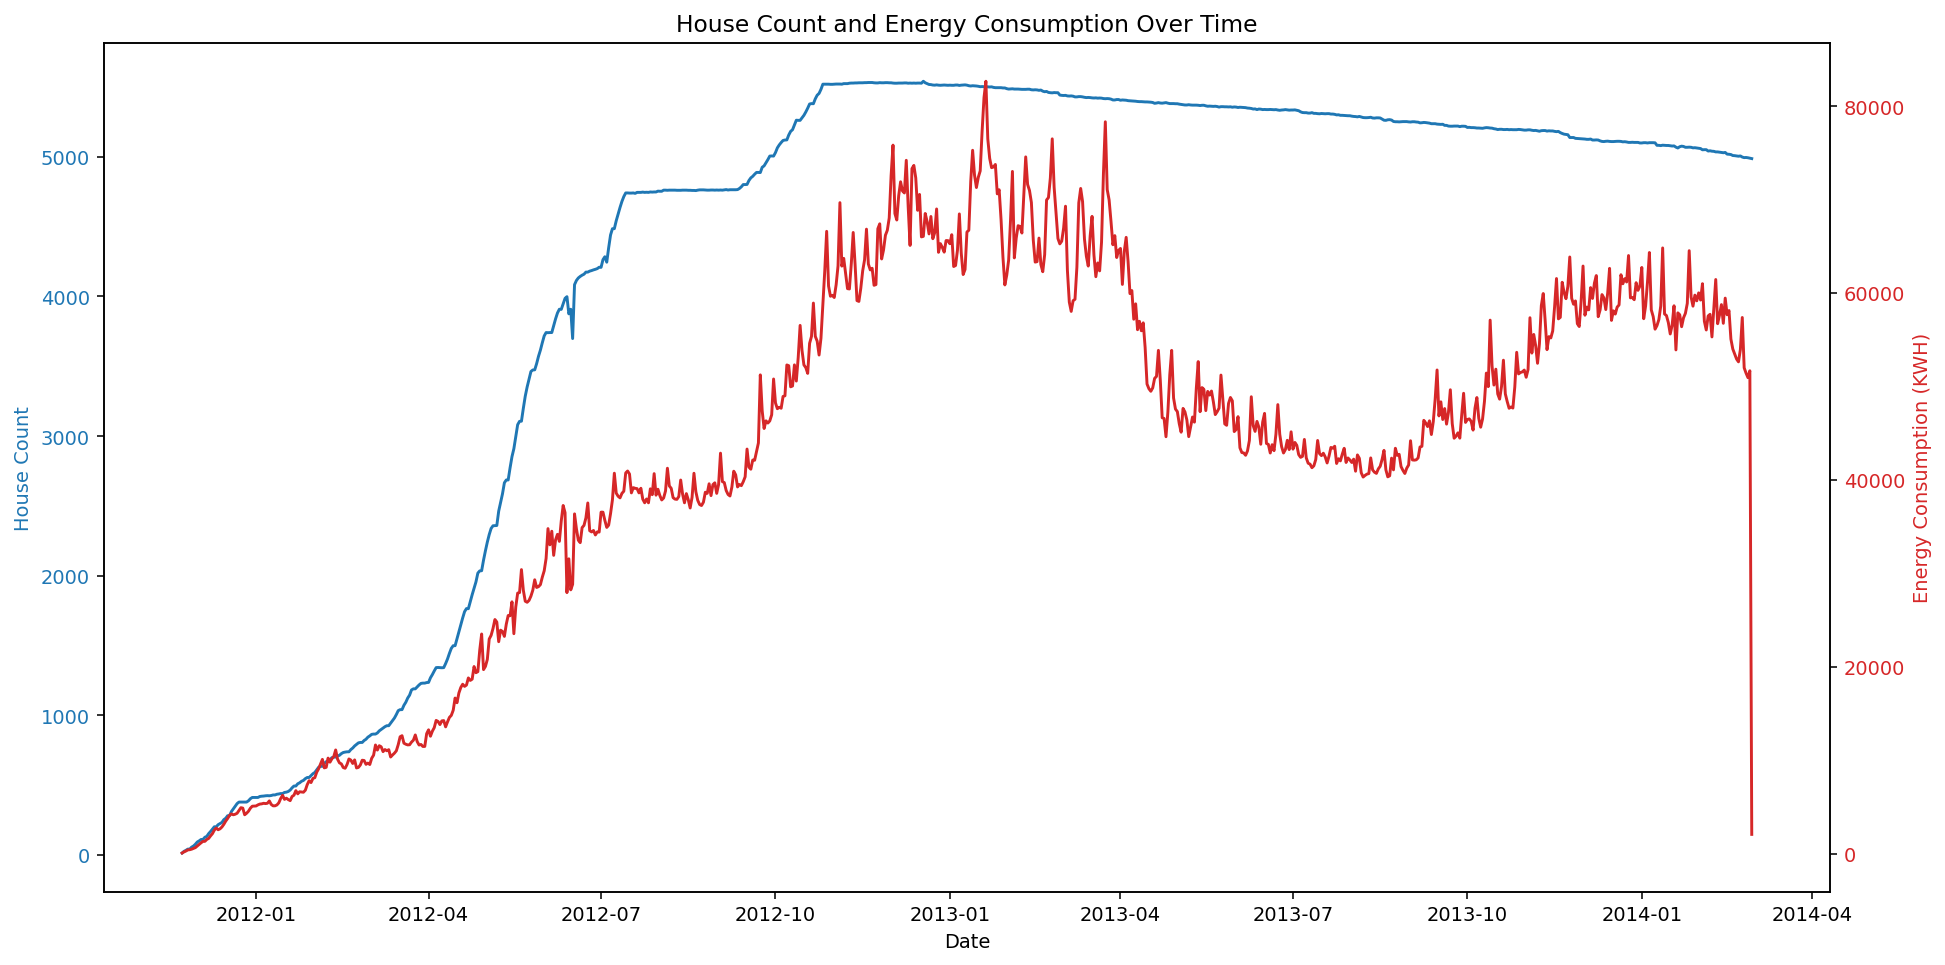

In [11]:
# Combine the two DataFrames
house_energy = housecount.join(energy_consumption)

# Verify the combined data
print(house_energy.head())

# Plot the number of households compared with energy consumption
fig, ax1 = plt.subplots(figsize=(14, 7), dpi=140)

# Plot house count on the first y-axis
ax1.set_xlabel('Date')
ax1.set_ylabel('House Count', color='tab:blue')
ax1.plot(house_energy.index, house_energy['housecount'], label='House Count', color='tab:blue')
ax1.tick_params(axis='y', labelcolor='tab:blue')

# Create a second y-axis to plot energy consumption
ax2 = ax1.twinx()
ax2.set_ylabel('Energy Consumption (KWH)', color='tab:red')
ax2.plot(house_energy.index, house_energy['Daily_Consumption_KWH'], label='Energy Consumption (KWH)', color='tab:red')
ax2.tick_params(axis='y', labelcolor='tab:red')

# Add a title and show the plot
plt.title('House Count and Energy Consumption Over Time')
fig.tight_layout()
plt.show()

Missing values in merged_data:
LCLid                    0
stdorToU                 0
Date                     0
Daily_Consumption_KWH    0
CC                       0
RR                       0
TG                       0
HU                       0
SS                       0
PP                       0
SD                       0
QQ                       0
dtype: int64


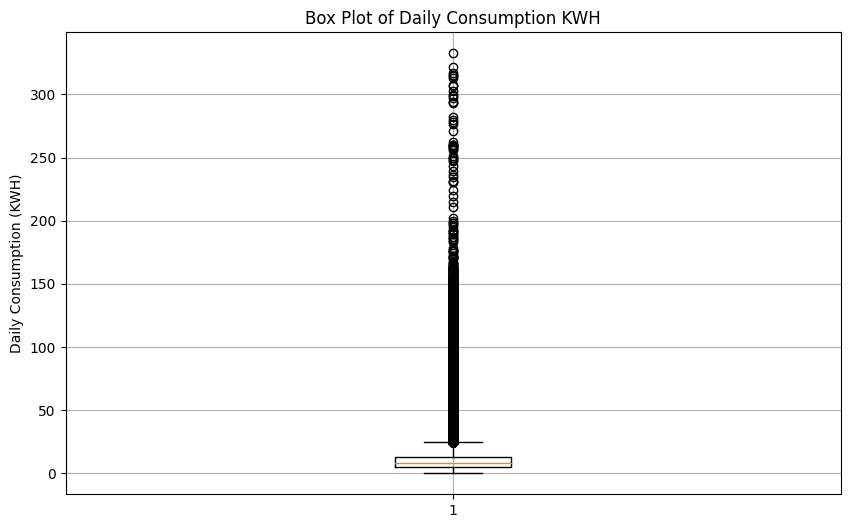

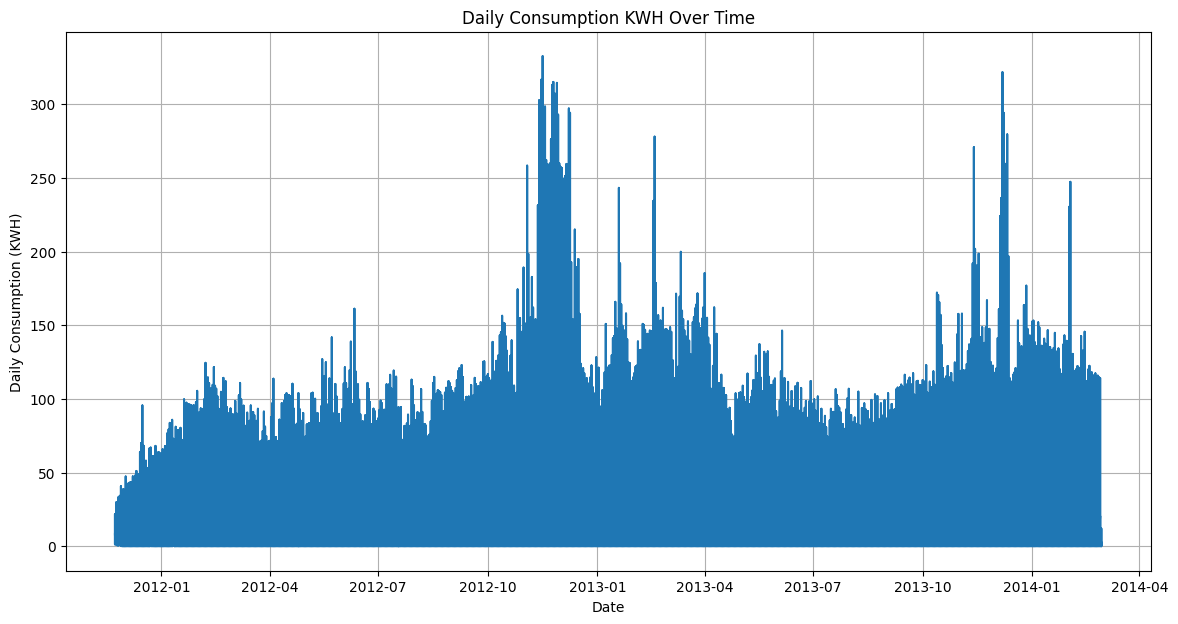

In [12]:
# Check for missing values
print("Missing values in merged_data:")
print(merged_data.isnull().sum())

# Check for outliers in Daily Consumption KWH
plt.figure(figsize=(10, 6))
plt.boxplot(merged_data['Daily_Consumption_KWH'])
plt.title('Box Plot of Daily Consumption KWH')
plt.ylabel('Daily Consumption (KWH)')
plt.grid(True)
plt.show()

# Explore temporal patterns
plt.figure(figsize=(14, 7))
plt.plot(merged_data['Date'], merged_data['Daily_Consumption_KWH'])
plt.title('Daily Consumption KWH Over Time')
plt.xlabel('Date')
plt.ylabel('Daily Consumption (KWH)')
plt.grid(True)
plt.show()

In [112]:
merged_data['Daily_Consumption_KWH'].sum()

35560708.67038622

In [5]:


# Split the data based on 'stdorToU' column and sum the energy consumed
std_df = merged_data[merged_data['stdorToU'] == 'Std'].groupby(['LCLid', 'Date', 'CC', 'RR', 'TG', 'HU', 'SS', 'PP', 'SD', 'QQ'])['Daily_Consumption_KWH'].sum().reset_index()
tou_df = merged_data[merged_data['stdorToU'] == 'ToU'].groupby(['LCLid', 'Date', 'CC', 'RR', 'TG', 'HU', 'SS', 'PP', 'SD', 'QQ'])['Daily_Consumption_KWH'].sum().reset_index()


std_df

LCLid        Date  CC   RR   TG  HU  SS     PP  SD   QQ  \
0        MAC000002  2012-10-12   5    0  123  73  64  10058   0  106   
1        MAC000002  2012-10-13   4    8   96  83  41  10048   0   85   
2        MAC000002  2012-10-14   1    0   74  79  77  10027   0  113   
3        MAC000002  2012-10-15   6   14   86  82   6  10024   0   44   
4        MAC000002  2012-10-16   4  120  121  72  73  10009   0  107   
...            ...         ...  ..  ...  ...  ..  ..    ...  ..  ...   
2804397  MAC005567  2014-02-24   4   32  109  75  44  10050   0   82   
2804398  MAC005567  2014-02-25   5   26   94  78  20  10005   0   60   
2804399  MAC005567  2014-02-26   1   28   74  73  77  10127   0  111   
2804400  MAC005567  2014-02-27   4   48   89  74  49  10070   0   90   
2804401  MAC005567  2014-02-28   7   34   51  85  10   9989   0   50   

         Daily_Consumption_KWH  
0                        7.098  
1                       11.087  
2                       13.223  
3                       10.257  
4                        9.769  
...                        ...  
2804397                  4.107  
2804398                  5.762  
2804399                  5.066  
2804400                  3.217  
2804401                  0.366  

[2804402 rows x 11 columns]

In [6]:
def dataframe(data):
    # Filter out rows with zero daily consumption
    df_filtered = data[data['Daily_Consumption_KWH'] > 0]

    # Group by Date and calculate the sum of Daily_Consumption_KWH and the house count
    grouped = df_filtered.groupby('Date').agg({
        'CC': 'first',  # assuming taking the first value for these columns is okay
        'RR': 'first',
        'TG': 'first',
        'HU': 'first',
        'SS': 'first',
        'PP': 'first',
        'SD': 'first',
        'QQ': 'first',
        'Daily_Consumption_KWH': 'sum',
        'LCLid': 'nunique'  # count of unique house ids
    }).reset_index()

    # Rename columns
    grouped.rename(columns={
        'CC': 'Cloud cover (oktas)',
        'RR': 'Precipitation (0.1 mm)',
        'TG': 'Temperature (0.1°C)',
        'HU': 'Humidity (1%)',
        'SS': 'Sunshine (0.1 hrs)',
        'PP': 'Sea level (0.1 hPa)',
        'SD': 'Snow depth (1 cm)',
        'QQ': 'Radiation (W/m2)',
        'Daily_Consumption_KWH': 'Energy (KWh)',
        'LCLid': 'housecount'
    }, inplace=True)

    return grouped


In [7]:
std_data = dataframe(std_df)
std_data

Date  Cloud cover (oktas)  Precipitation (0.1 mm)  \
0    2011-11-23                    7                       2   
1    2011-11-24                    3                       2   
2    2011-11-25                    3                       0   
3    2011-11-26                    4                       0   
4    2011-11-27                    3                       0   
..          ...                  ...                     ...   
824  2014-02-24                    4                      32   
825  2014-02-25                    5                      26   
826  2014-02-26                    1                      28   
827  2014-02-27                    4                      48   
828  2014-02-28                    7                      34   

     Temperature (0.1°C)  Humidity (1%)  Sunshine (0.1 hrs)  \
0                     68             93                  20   
1                     86             88                  20   
2                    110             78                  50   
3                    102             79                   7   
4                    118             69                  59   
..                   ...            ...                 ...   
824                  109             75                  44   
825                   94             78                  20   
826                   74             73                  77   
827                   89             74                  49   
828                   51             85                  10   

     Sea level (0.1 hPa)  Snow depth (1 cm)  Radiation (W/m2)  Energy (KWh)  \
0                  10272                  0                35     81.730000   
1                  10271                  0                35    188.965000   
2                  10245                  0                52    262.675000   
3                  10258                  0                24    374.719000   
4                  10213                  0                55    398.002001   
..                   ...                ...               ...           ...   
824                10050                  0                82  41971.603004   
825                10005                  0                60  41468.498001   
826                10127                  0               111  40954.587996   
827                10070                  0                90  41647.433999   
828                 9989                  0                50   1727.588000   

     housecount  
0            11  
1            21  
2            26  
3            35  
4            35  
..          ...  
824        3948  
825        3947  
826        3944  
827        3943  
828        3905  

[829 rows x 11 columns]

In [8]:
tou_data = dataframe(tou_df)
tou_data


Date  Cloud cover (oktas)  Precipitation (0.1 mm)  \
0    2011-11-23                    7                       2   
1    2011-11-24                    3                       2   
2    2011-11-25                    3                       0   
3    2011-11-26                    4                       0   
4    2011-11-27                    3                       0   
..          ...                  ...                     ...   
824  2014-02-24                    4                      32   
825  2014-02-25                    5                      26   
826  2014-02-26                    1                      28   
827  2014-02-27                    4                      48   
828  2014-02-28                    7                      34   

     Temperature (0.1°C)  Humidity (1%)  Sunshine (0.1 hrs)  \
0                     68             93                  20   
1                     86             88                  20   
2                    110             78                  50   
3                    102             79                   7   
4                    118             69                  59   
..                   ...            ...                 ...   
824                  109             75                  44   
825                   94             78                  20   
826                   74             73                  77   
827                   89             74                  49   
828                   51             85                  10   

     Sea level (0.1 hPa)  Snow depth (1 cm)  Radiation (W/m2)  Energy (KWh)  \
0                  10272                  0                35      8.655000   
1                  10271                  0                35     24.447000   
2                  10245                  0                52     41.318000   
3                  10258                  0                24     46.257000   
4                  10213                  0                55     46.881000   
..                   ...                ...               ...           ...   
824                10050                  0                82  10022.944000   
825                10005                  0                60   9955.010001   
826                10127                  0               111   9988.717999   
827                10070                  0                90  10030.751999   
828                 9989                  0                50    356.944000   

     housecount  
0             2  
1             4  
2             6  
3             6  
4             6  
..          ...  
824        1027  
825        1028  
826        1028  
827        1026  
828        1020  

[829 rows x 11 columns]

In [16]:
final_data = dataframe(merged_data)
final_data

Date  Cloud cover (oktas)  Precipitation (0.1 mm)  \
0    2011-11-23                    7                       2   
1    2011-11-24                    3                       2   
2    2011-11-25                    3                       0   
3    2011-11-26                    4                       0   
4    2011-11-27                    3                       0   
..          ...                  ...                     ...   
824  2014-02-24                    4                      32   
825  2014-02-25                    5                      26   
826  2014-02-26                    1                      28   
827  2014-02-27                    4                      48   
828  2014-02-28                    7                      34   

     Temperature (0.1°C)  Humidity (1%)  Sunshine (0.1 hrs)  \
0                     68             93                  20   
1                     86             88                  20   
2                    110             78                  50   
3                    102             79                   7   
4                    118             69                  59   
..                   ...            ...                 ...   
824                  109             75                  44   
825                   94             78                  20   
826                   74             73                  77   
827                   89             74                  49   
828                   51             85                  10   

     Sea level (0.1 hPa)  Snow depth (1 cm)  Radiation (W/m2)  Energy (KWh)  \
0                  10272                  0                35     90.385000   
1                  10271                  0                35    213.412000   
2                  10245                  0                52    303.993000   
3                  10258                  0                24    420.976000   
4                  10213                  0                55    444.883001   
..                   ...                ...               ...           ...   
824                10050                  0                82  51994.547004   
825                10005                  0                60  51423.508001   
826                10127                  0               111  50943.305995   
827                10070                  0                90  51678.185998   
828                 9989                  0                50   2084.532000   

     housecount  
0            13  
1            25  
2            32  
3            41  
4            41  
..          ...  
824        4975  
825        4975  
826        4972  
827        4969  
828        4925  

[829 rows x 11 columns]

In [10]:
def plot_compare(data):
    # Ensure the 'Date' column is datetime type
    data['Date'] = pd.to_datetime(data['Date'])

    # Set 'Date' as the index for time series plotting
    data.set_index('Date', inplace=True)

    # List of variables to compare with Energy (KWh)
    variables = ['Temperature (0.1°C)', 'Humidity (1%)', 'Precipitation (0.1 mm)',
                 'Cloud cover (oktas)', 'Sunshine (0.1 hrs)', 'Sea level (0.1 hPa)',
                 'Snow depth (1 cm)', 'Radiation (W/m2)', 'housecount']

    # Define number of rows and columns for the grid
    num_vars = len(variables)
    cols = 3
    rows = (num_vars + cols - 1) // cols  # Ensure enough rows

    # Create subplots
    plt.style.use('seaborn')
    fig, axes = plt.subplots(nrows=rows, ncols=cols, figsize=(20, 5 * rows), dpi=120, sharex=True)
    axes = axes.flatten()  # Flatten to easily iterate over

    for i, var in enumerate(variables):
        ax1 = axes[i]
        ax2 = ax1.twinx()

        # Plot Energy (KWh) on primary y-axis
        ax1.plot(data.index, data['Energy (KWh)'], label='Energy (KWh)', color='blue')
        ax1.set_ylabel('Energy (KWh)', color='blue')
        ax1.tick_params(axis='y', labelcolor='blue')

        # Plot the variable on secondary y-axis
        ax2.plot(data.index, data[var], label=var, color='green')
        ax2.set_ylabel(var, color='green')
        ax2.tick_params(axis='y', labelcolor='green')

        # Set title
        ax1.set_title(f'Energy vs {var}')

        # Add legend
        lines, labels = ax1.get_legend_handles_labels()
        lines2, labels2 = ax2.get_legend_handles_labels()
        ax1.legend(lines + lines2, labels + labels2, loc='upper left')

    # Remove any empty subplots
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

  # Rotate x-axis labels for better visibility
    for ax in axes:
        plt.sca(ax)
        plt.xticks(rotation=45)

    plt.xlabel('Date')
    plt.tight_layout()
    plt.show()

<ipython-input-10-d8321a02a2e1>:19: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


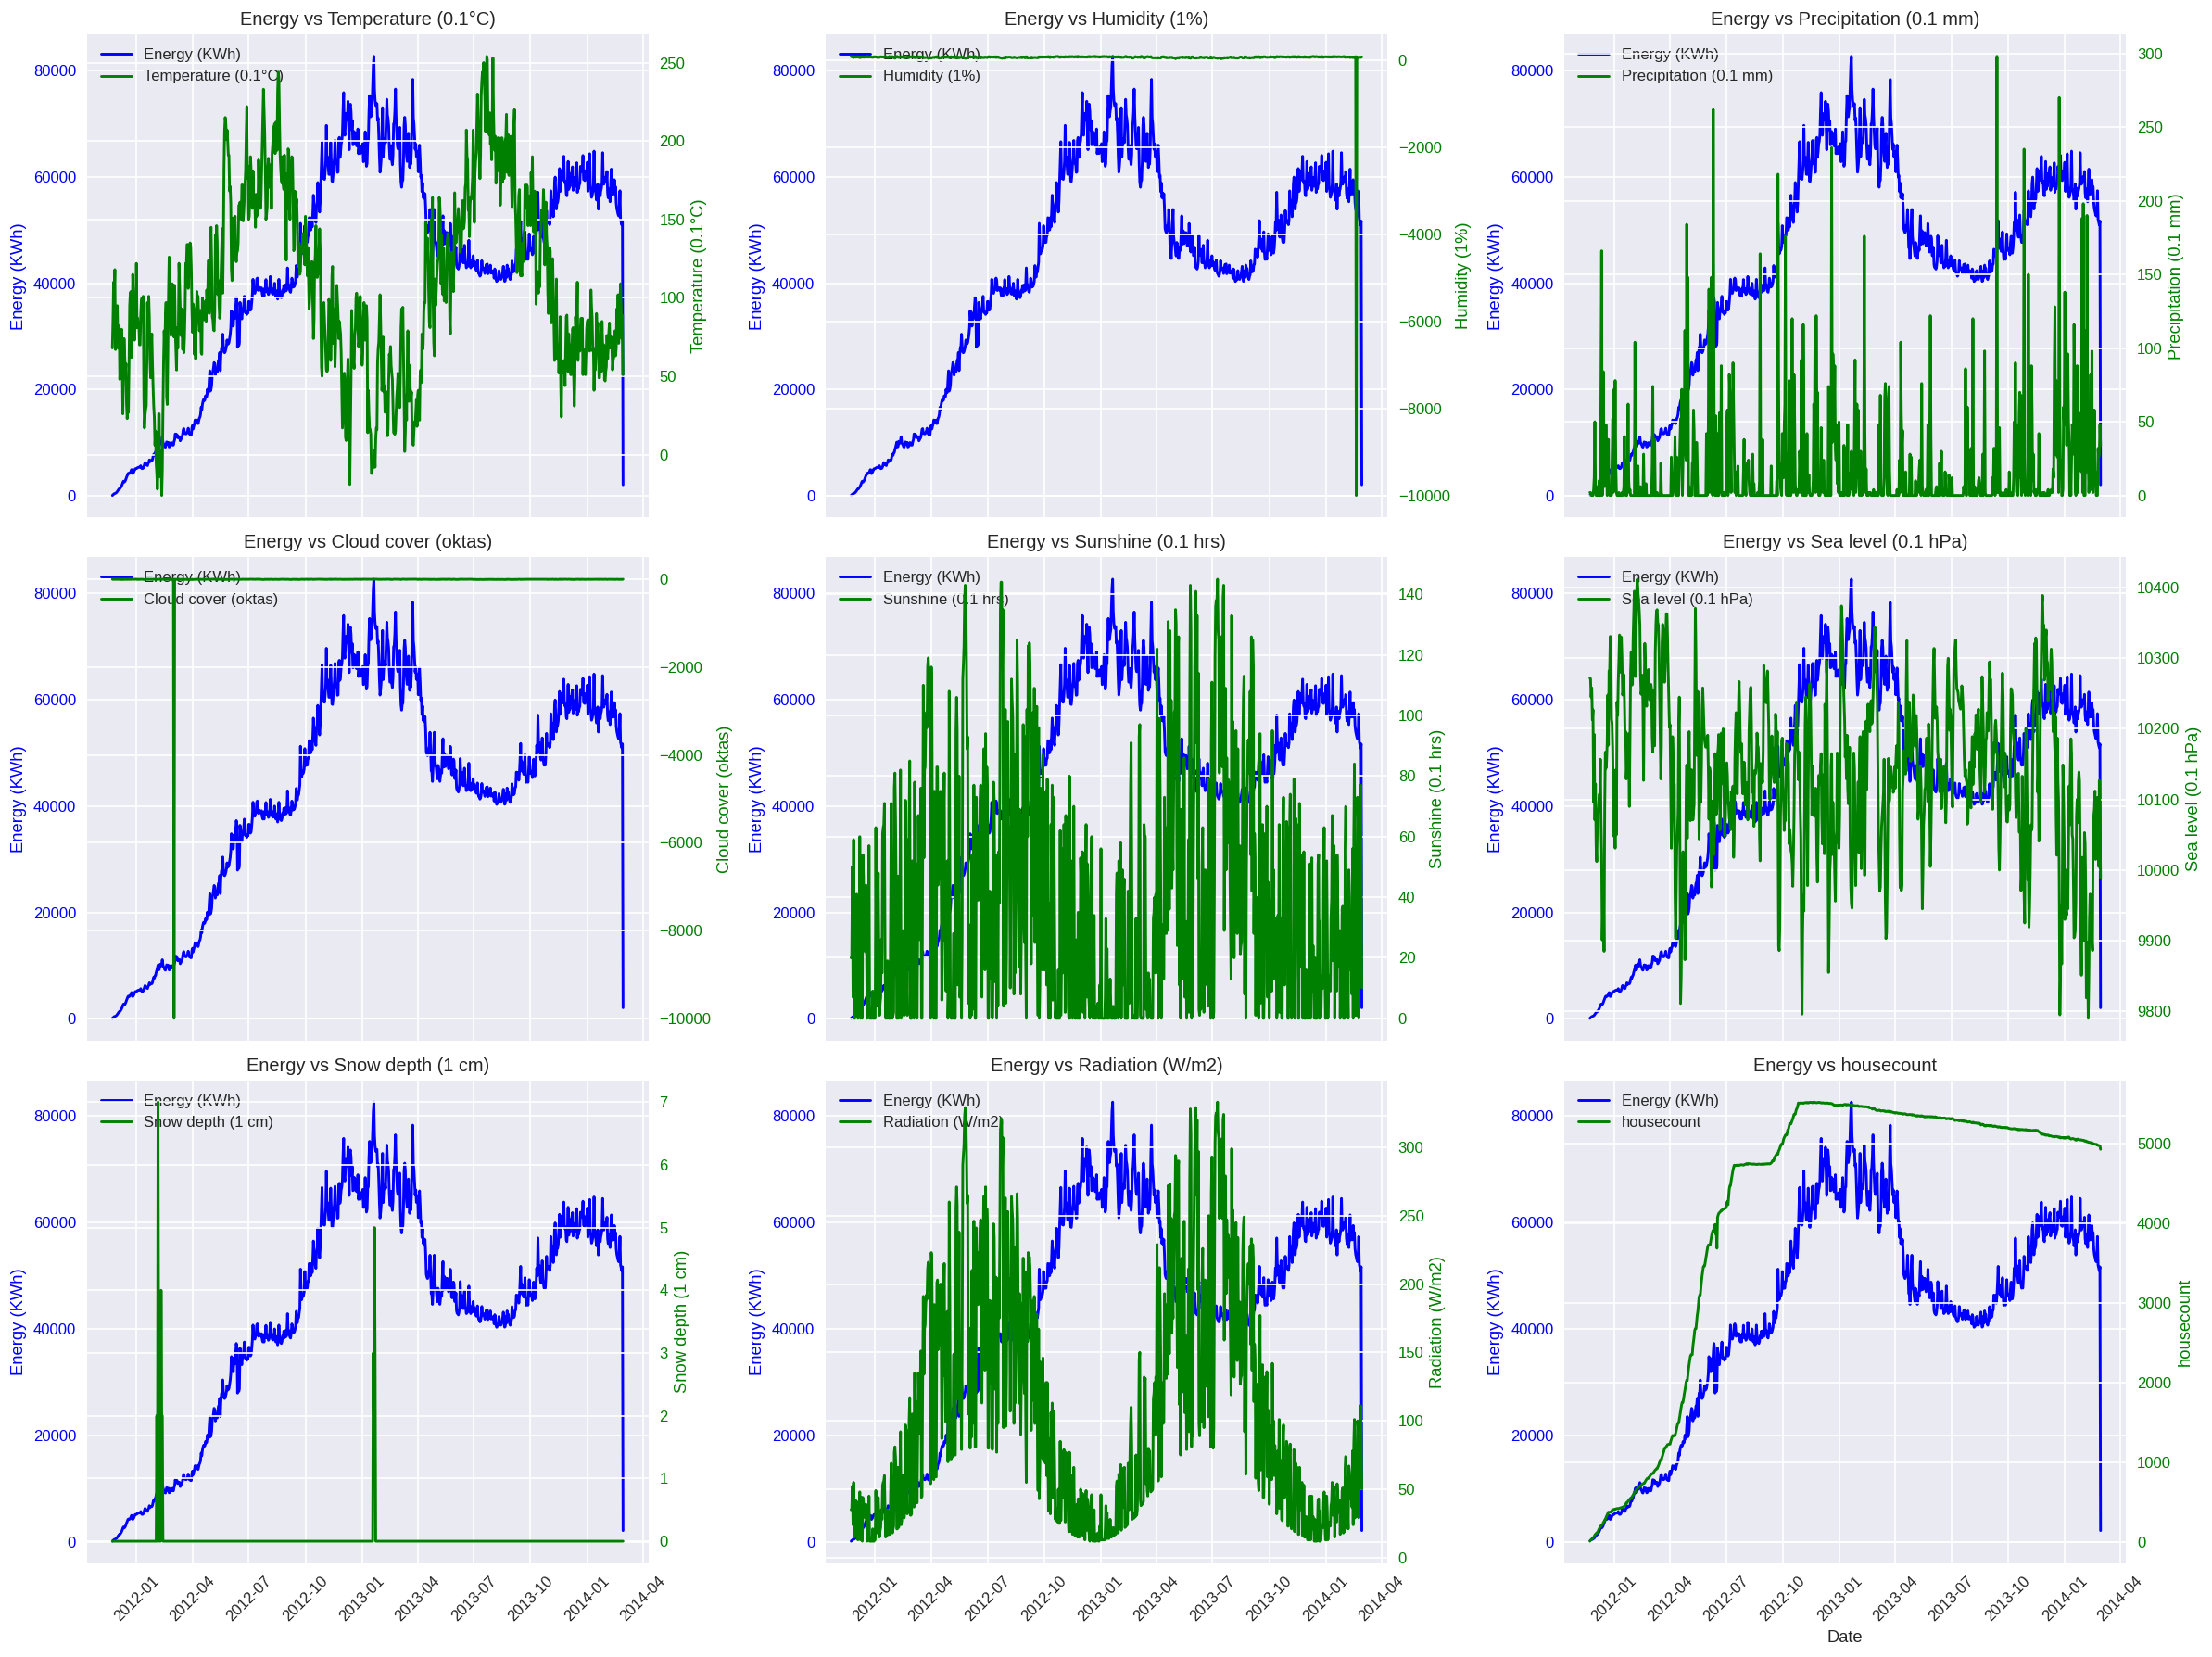

In [11]:
plot_compare(final_data)

<ipython-input-57-d8321a02a2e1>:19: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


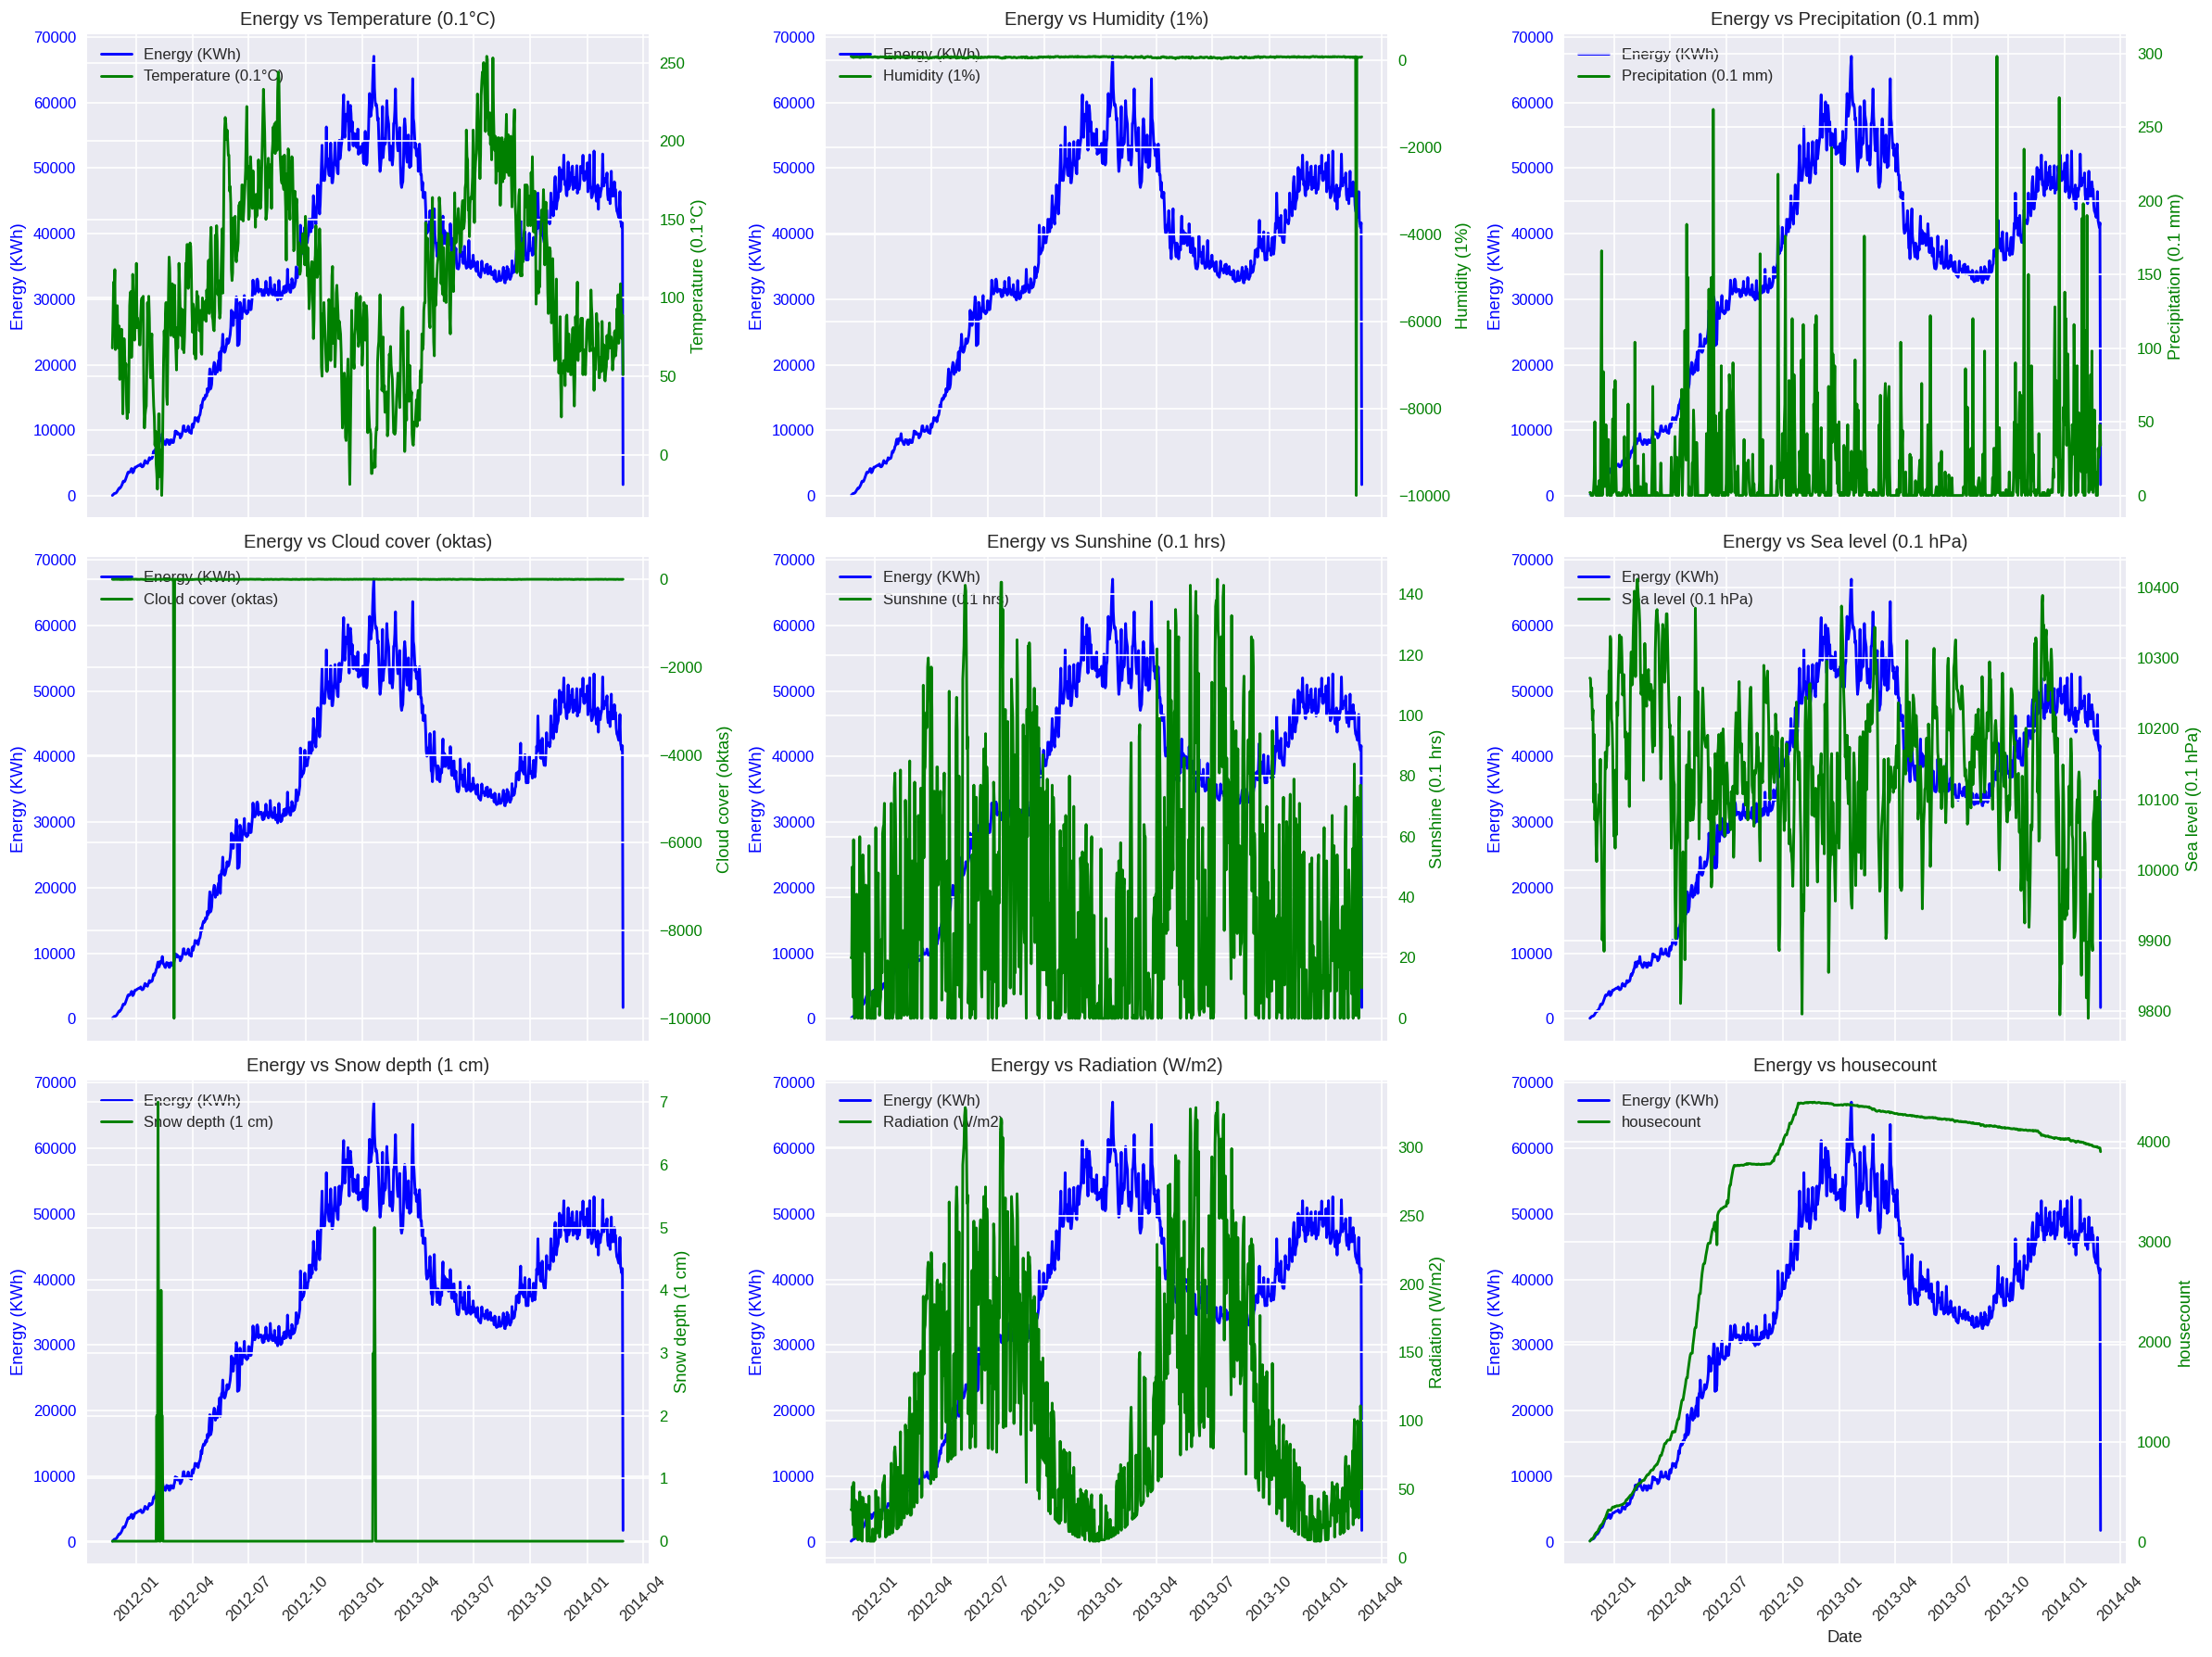

In [59]:
plot_compare(std_data)

<ipython-input-57-d8321a02a2e1>:19: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


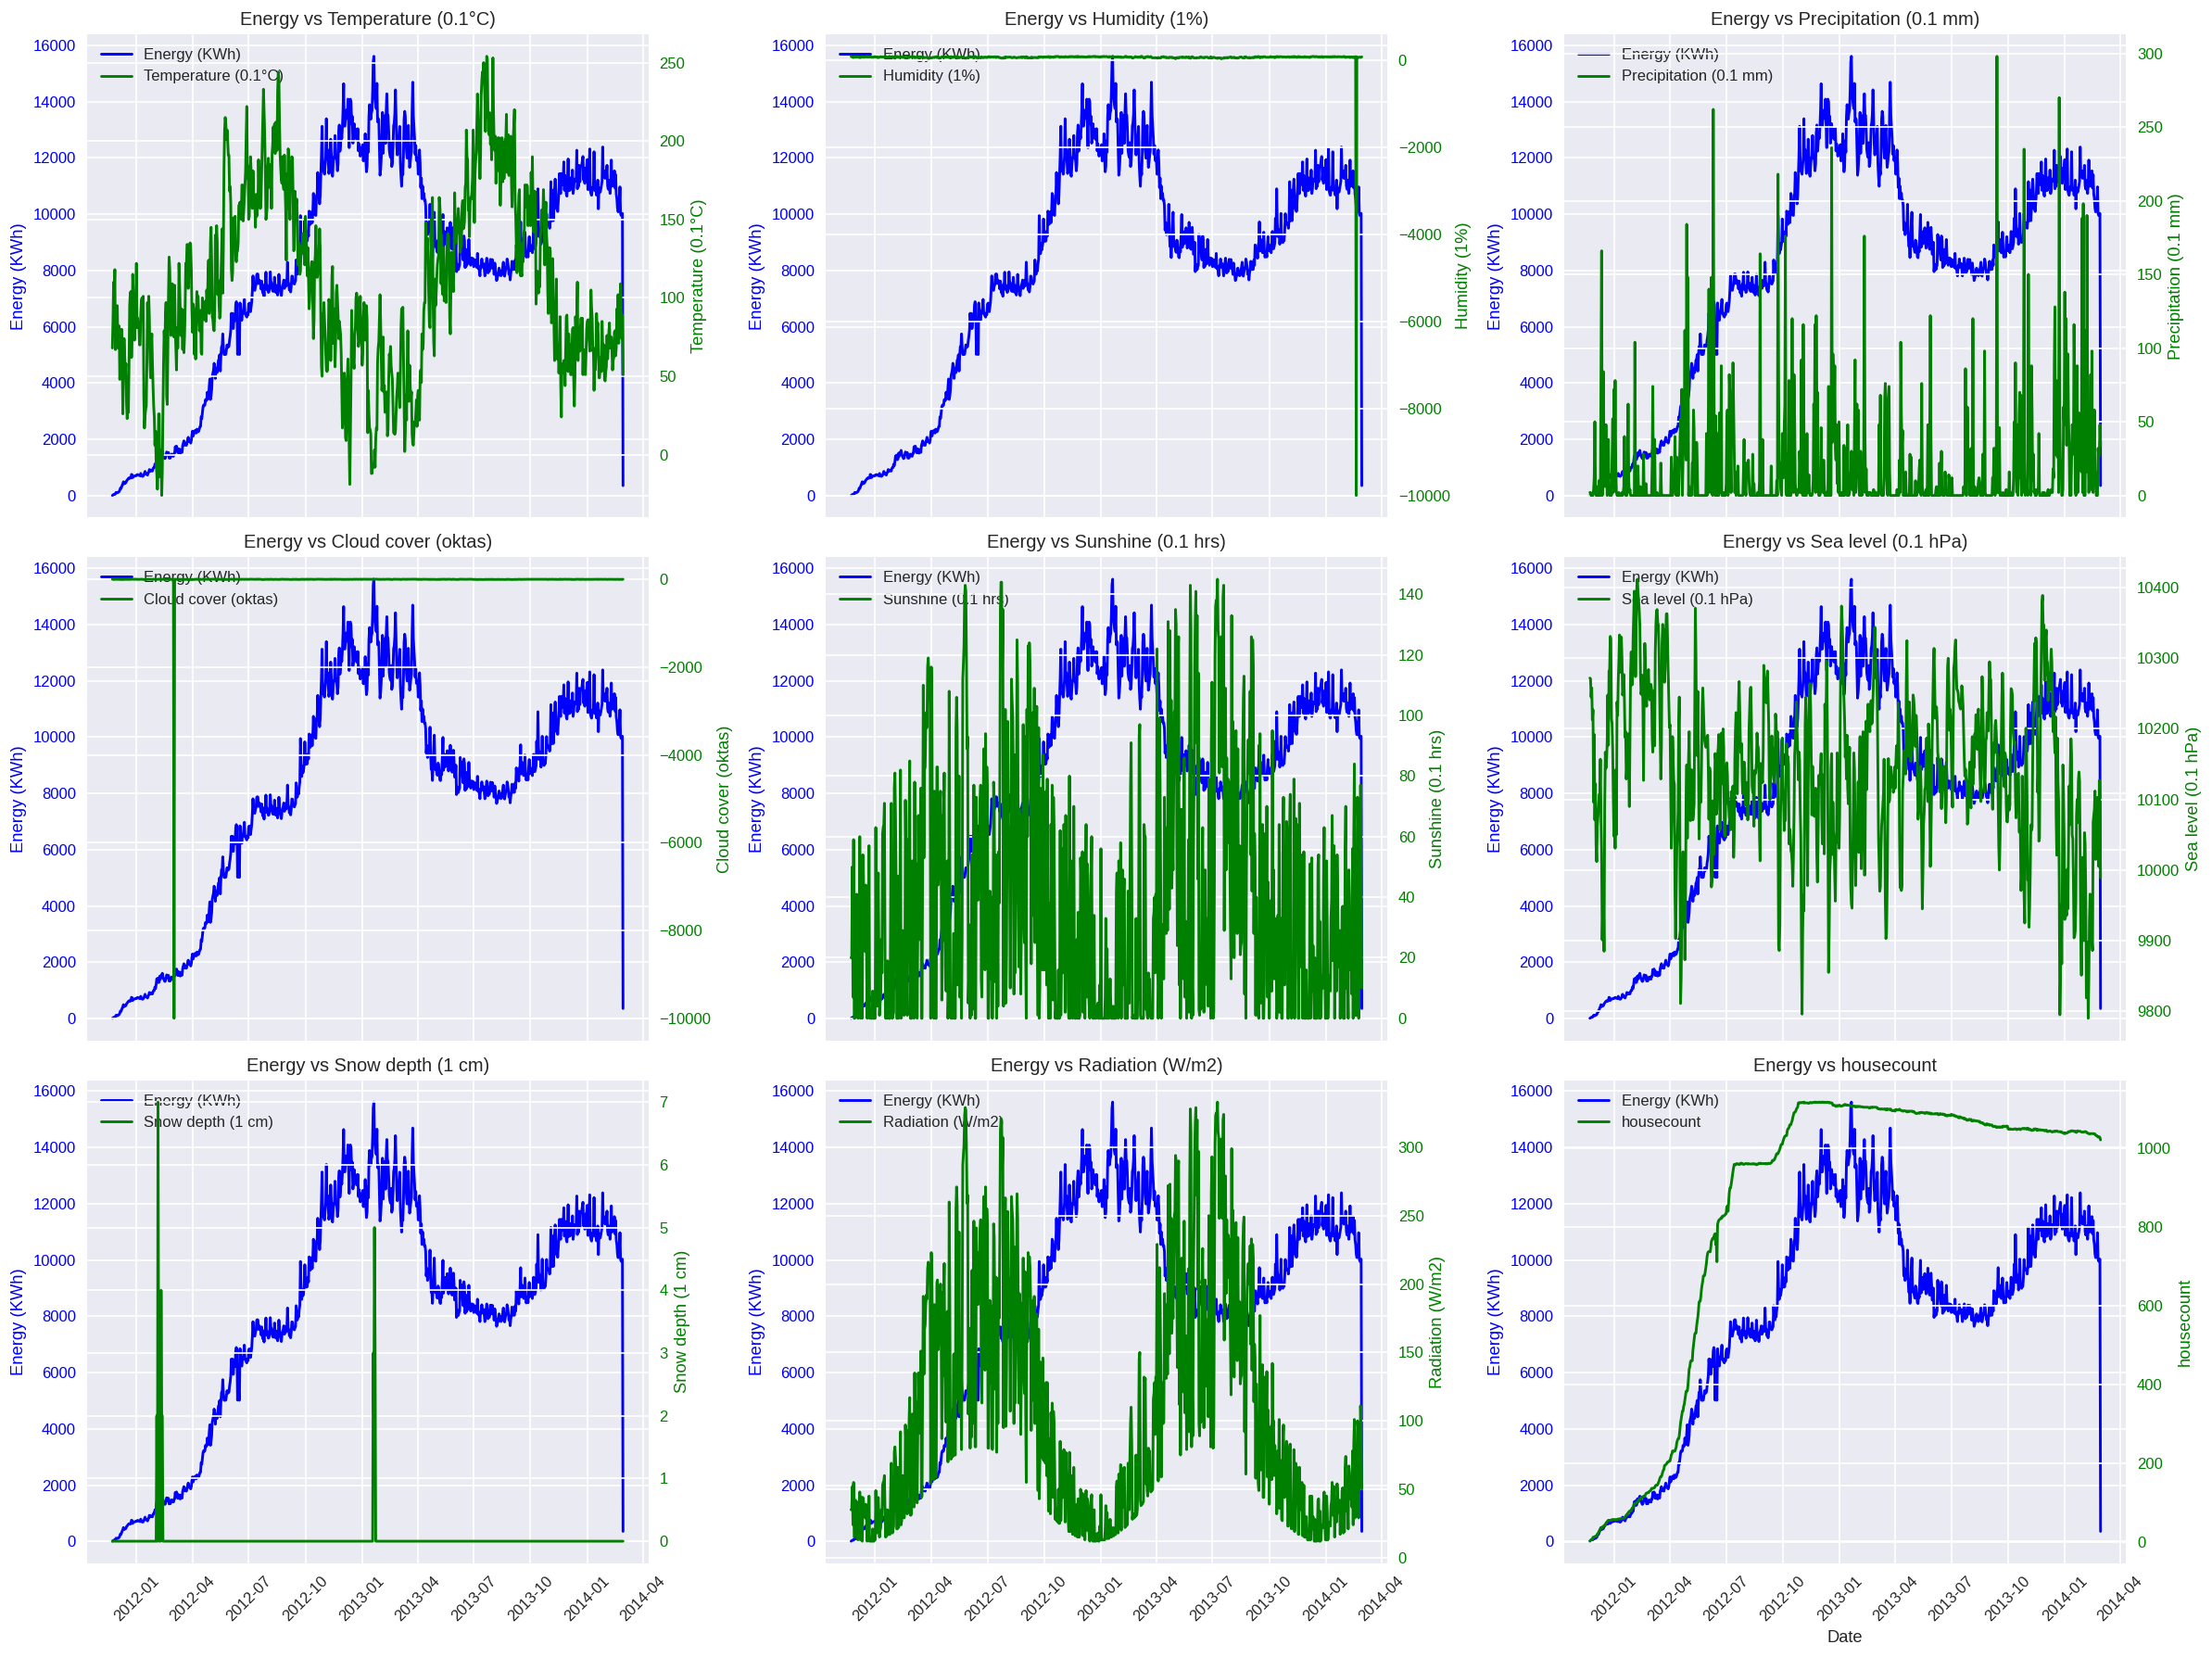

In [60]:
plot_compare(tou_data)

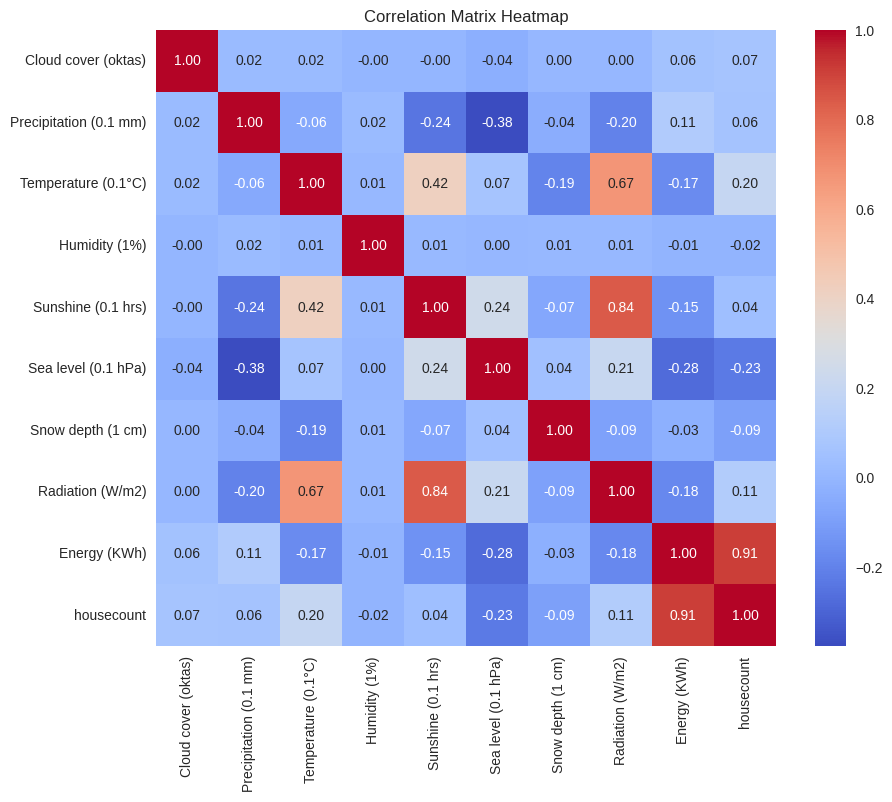

In [65]:
def correlation(data):
    # Calculate correlation matrix
    corr = data.corr()

    # Create a heatmap
    plt.figure(figsize=(12, 8))
    sns.heatmap(corr, annot=True, cmap='coolwarm', center=0)

    # Set title and show plot
    plt.title('Correlation Matrix')
    plt.show()

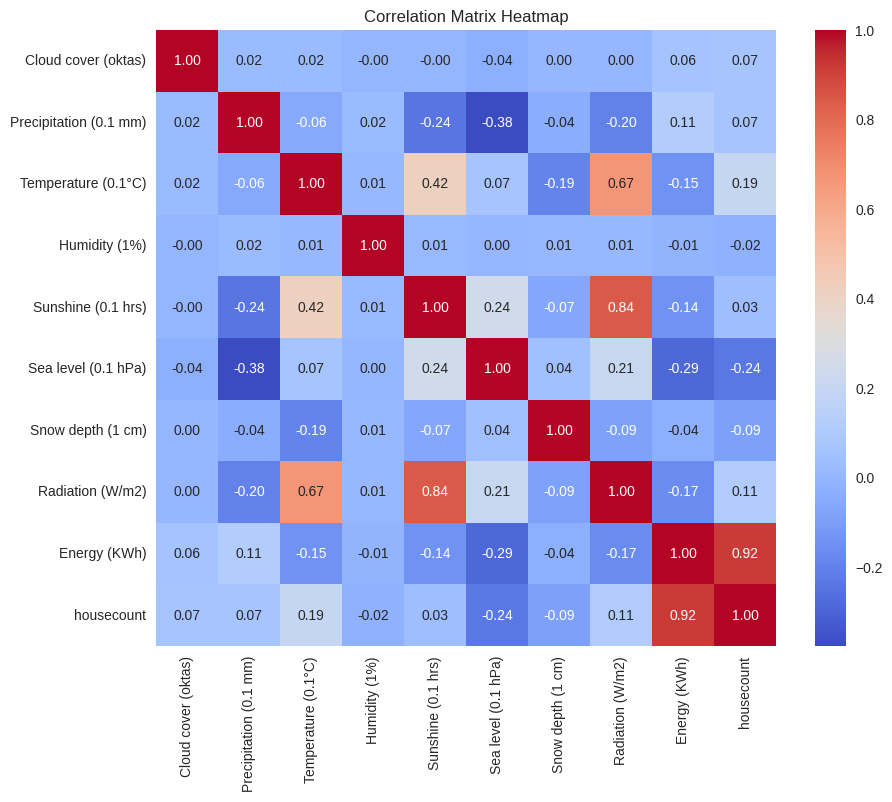

In [66]:
correlation(tou_data)

In [22]:
from sklearn.ensemble import IsolationForest

def anomaly(data):
    # Ensure 'Date' column is datetime type
    data['Date'] = pd.to_datetime(data['Date'])

    # Apply Isolation Forest for anomaly detection
    iso_forest = IsolationForest(contamination=0.01, random_state=42)
    data['Anomaly'] = iso_forest.fit_predict(data[['Energy (KWh)']])

    # Plot anomalies
    fig, ax1 = plt.subplots(figsize=(14, 7), dpi=140)
    ax1.scatter(data['Date'], data['Energy (KWh)'], c=data['Anomaly'], cmap='coolwarm', label='Energy Consumption')

    ax1.set_title('Anomalies in Energy Consumption')
    ax1.set_xlabel('Date')
    ax1.set_ylabel('Energy (KWh)')
    ax1.tick_params(axis='x', rotation=45)
    ax1.grid(True)
    ax1.legend()

    plt.tight_layout()  # Adjust layout for better fit
    plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


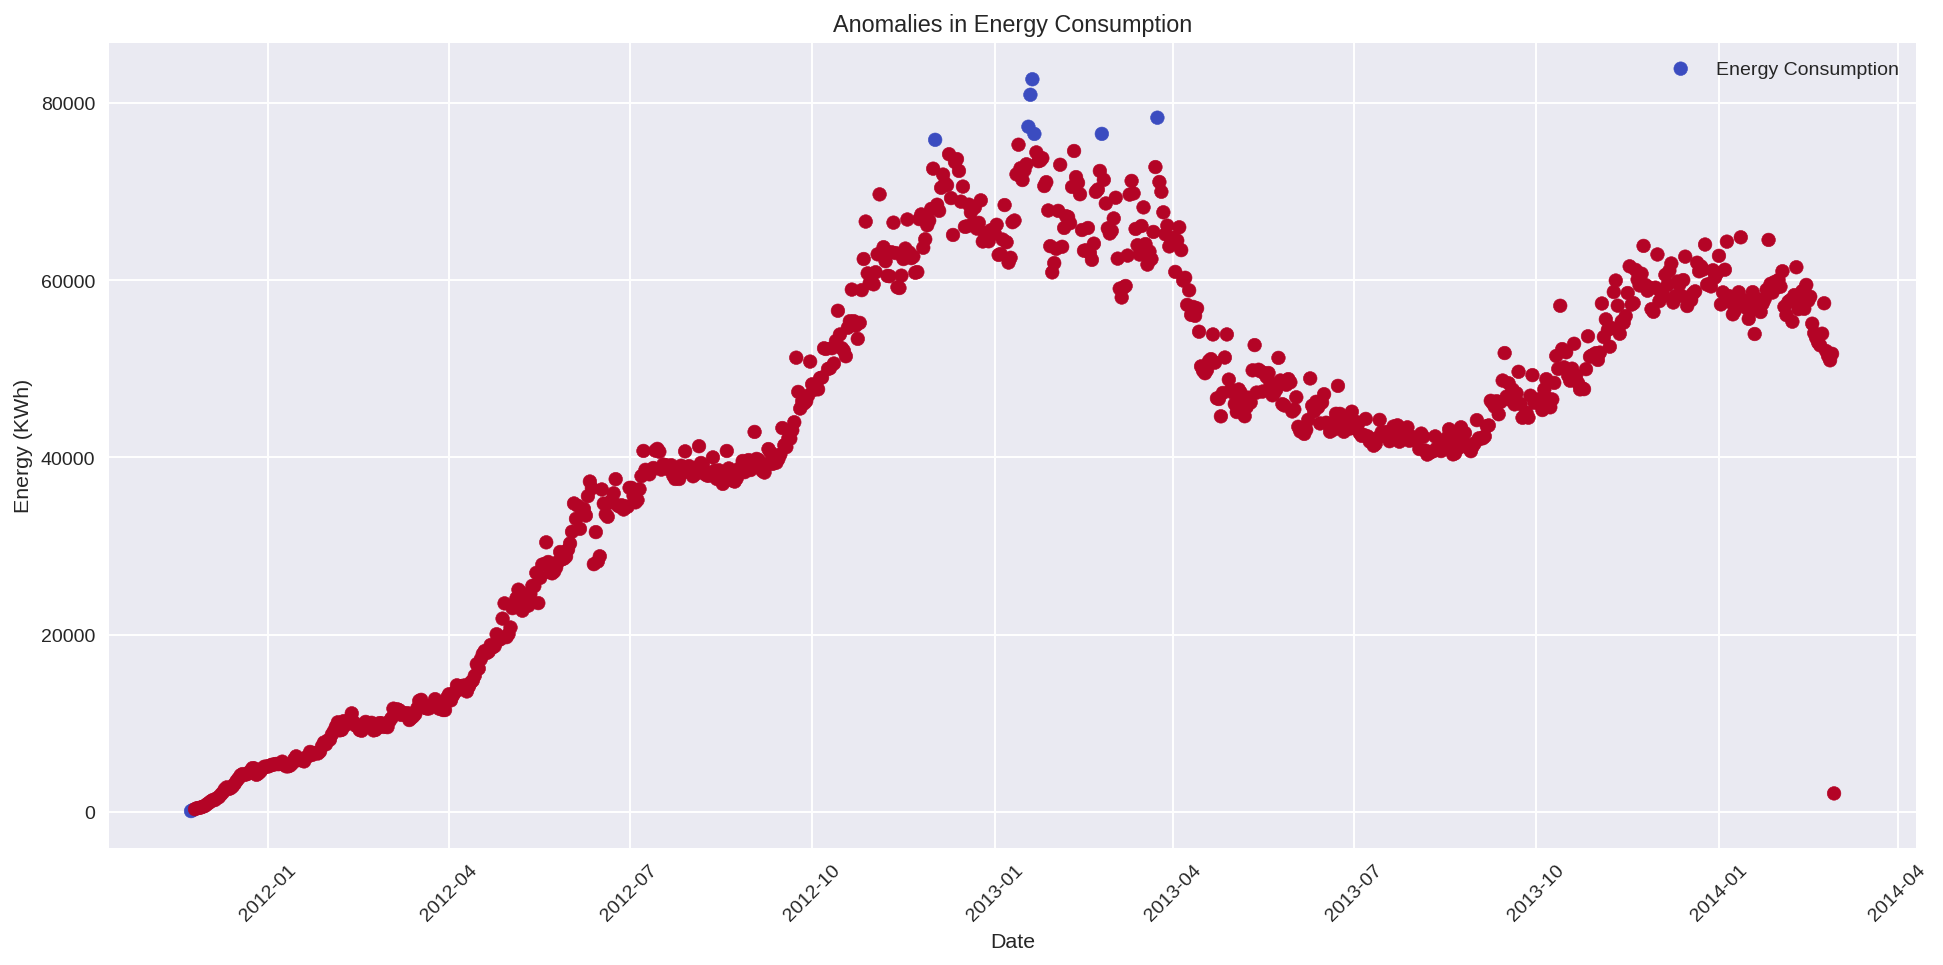

In [23]:
anomaly(final_data)